# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645933 sha256=62dff83b9c073c6c7f9094b50fbd30fcd84fb02ccca5daafb7c3919e6f09bf02
  Stored in directory: /root/.cache/pip/wheels/80/ad/d4/9e1a0939f63331a3898f2a951a368bbf0d69f7b027cae4d66b
Successfully built vncorenlp


In [6]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4304 sha256=a891ceb5efc229571691b9ebd1c75839278044873d8baa3206d101875f0d8fb1
  Stored in directory: /root/.cache/pip/wheels/6d/2d/d6/158260bfd6820d144535857b80cc112bee5c3aa6d81b6dc049
Successfully built py_vncorenlp


In [7]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 3.5 MB/s eta 0:00:00


In [8]:
!pip install transformers

In [9]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.2 MB/s eta 0:00:00


## Library Setup

In [10]:
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [11]:
import numpy as np
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [14]:
#Set up vncorelp to use in this assignment
import logging
from vncorenlp import VnCoreNLP
import py_vncorenlp

In [4]:
!cp '/content/drive/MyDrive/IE304/scripts/abbreviations.py' '/content/abbreviations.py'

In [12]:
!ls

abbreviations.py  drive  sample_data


In [23]:
from abbreviations import Abb

In [27]:
import pandas as pd

class Abb():
    word = set()
    dic = dict()
    def __init__(self):
        df = pd.read_csv('/content/drive/MyDrive/IE304/Abbreviations.csv')
        for abb,nor in zip(df['Abbreviations'],df['Normalization']):
            ls = abb.split(',')
            for wor in ls:
                self.word.add(wor)
                self.dic[wor] = nor
    def rep(self,text):
        if text in self.word:
            return self.dic[text]
        else:
            return text

In [15]:
#py_vncorenlp.download_model(save_dir='/content/drive/MyDrive/Sarcasm/vnNLP')
py_vncorenlp.download_model(save_dir='/content/')

# Load VnCoreNLP from the local working folder that contains both `VnCoreNLP-1.2.jar` and `models`
#model = py_vncorenlp.VnCoreNLP(save_dir='/content/drive/MyDrive/Sarcasm/vnNLP')
model_vncorenlp = py_vncorenlp.VnCoreNLP(save_dir='/content/')

#Load data

In [16]:
link_data = '/content/drive/MyDrive/IE304/Dataset.csv'
data = pd.read_csv(link_data)
data.head ()

,Id,Label,Comment
0,1,0,"Slayder, GAM cần anh."
1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!"
2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p..."
3,4,0,Mê cái cách anh này nhảy E
4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công


##Xóa mẫu chưa gán nhãn

In [17]:
index = data[data['Label'].isnull() == True].index
data.drop(index, inplace= True)

In [18]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10691 entries, 0 to 10690
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       10691 non-null  int64 
 1   Label    10691 non-null  int64 
 2   Comment  10691 non-null  object
dtypes: int64(2), object(1)
memory usage: 250.7+ KB


##Kiểm tra nhãn

In [19]:
values = set()
data['Label'].apply(lambda x: values.add(x))
print(values)

{0, 1, 2}


# Preprocessing - Tiền xử lý dữ liệu

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
#Đưa các từ lowercase
data['text'] = data['Comment'].str.lower()
#Loại bỏ dấu câu
character = ['\'','.',',','-',':','"','!','~','?',']','*']
character = set(character)
data['text'] = data['text'].apply(lambda x: ''.join([char for char in x if char not in character]))
data.head()

,Id,Label,Comment,text
0,1,0,"Slayder, GAM cần anh.",slayder gam cần anh
1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!",dạ mỗi khi gam cần em luôn sẵn sèng
2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p...",sờ ty lè k chỉ nhảy qua tường sờ ty lè nhảy ph...
3,4,0,Mê cái cách anh này nhảy E,mê cái cách anh này nhảy e
4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công,chúc mừng\ngam đã có kỳ chuyển nhượng thành công


##Giải nghĩa từ viết tắt

In [28]:
abb = Abb()
data['text'] = data['text'].apply(lambda x: ''.join([abb.rep(char)+' ' for char in x.split()]))
data.head()

,Id,Label,Comment,text
0,1,0,"Slayder, GAM cần anh.",slayder gam cần anh
1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!",dạ mỗi khi gam cần em luôn sẵn sèng
2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p...",sờ ty lè không chỉ nhảy qua tường sờ ty lè nhả...
3,4,0,Mê cái cách anh này nhảy E,mê cái cách anh này nhảy em
4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công,chúc mừng gam đã có kỳ chuyển nhượng thành công


##Word segmentation

In [29]:
#Thực hiện Word Segmentation bằng toolkit VNCoreLP
data['text'] = data['text'].apply(lambda x: " ".join(word for word in model_vncorenlp.word_segment(x)))

In [30]:
data.reset_index(inplace = True)
data

,index,Id,Label,Comment,text
0,0,1,0,"Slayder, GAM cần anh.",slayder gam cần_anh
1,1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!",dạ mỗi khi gam cần em luôn sẵn sèng
2,2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p...",sờ ty lè không_chỉ nhảy qua tường sờ ty lè nhả...
3,3,4,0,Mê cái cách anh này nhảy E,mê cái cách anh này nhảy em
4,4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công,chúc_mừng gam đã có kỳ chuyển_nhượng thành_công
...,...,...,...,...,...
10686,10686,10687,2,Người ta bảo người hay nói đạo lí thường sống ...,người ta bảo người hay nói đạo_lí thường sống ...
10687,10687,10688,2,Riêng tư sao đéo có hari má,riêng_tư sao đéo có hari má
10688,10688,10689,2,Nói đạo lý thường sống như iồn,nói đạo_lý thường sống như iồn
10689,10689,10690,2,Lũ ngu ngục tụi m bỏ tiền ủng hộ phim nó giờ n...,lũ ngu ngục tụi mày bỏ tiền ủng_hộ phim nó giờ...


##Bỏ Stopword

In [32]:
data_train = []

#Loại bỏ các stopword
link_vn_stopword = '/content/drive/MyDrive/IE304/vietnamese-stopwords.txt'
stop_words = set(line.strip() for line in open(link_vn_stopword))
for sentence in data['text']:
    sen_new = ""
    sen_temp = sentence.split()
    #print(sen_temp)
    for word in sen_temp:
        #print(word,'.')
        if (word not in stop_words):
            sen_new += word + " "
        #print()
    data_train.append(sen_new)

print ("Headlines after Preprocessing")
for i in range (0,20):
  print (f"{i+1}/",data_train[i])

Headlines after Preprocessing
1/ slayder gam cần_anh 
2/ gam sẵn sèng 
3/ sờ ty lè không_chỉ nhảy tường sờ ty lè nhảy phát team 
4/ mê nhảy 
5/ chúc_mừng gam kỳ chuyển_nhượng thành_công 
6/ mê nhảy 
7/ chuẩn thoát pressing luônnn 
8/ ok chúc sơn thành công đường tiếp giờ thì hóng ad mới 
9/ gam đầu_tư đi cửa sân_bay 
10/ trận best gánh 
11/ thằng hankay out hài vãi lồn đôn huấn_luyện_viên tạm vị_trí analyst gam tuyển huấn_luyện_viên chả ảnh_hưởng 
12/ msi xong thank you vị_trí sty1e 
13/ đem shogun đem taki 2 đánh kết_hợp 
14/ thầy sty1e lck hướng_dẫn thằng peyz thằng guma đánh zeri 2 thằng đánh ngu 
15/ dũng phạm se gam giúp thoát pressing 
16/ nghi_thức hiến tế bắt_đầu 
17/ ôi cảm_động hoá_thân thành fan gam khứa hơi anti gam một_chút 
18/ kick ác nhường chỗ tướng_quân 
19/ tao đợi thank you kati mãi 
20/ mong sty1e 


In [33]:
data['Comment'] = data_train
data

,index,Id,Label,Comment,text
0,0,1,0,slayder gam cần_anh,slayder gam cần_anh
1,1,2,0,gam sẵn sèng,dạ mỗi khi gam cần em luôn sẵn sèng
2,2,3,0,sờ ty lè không_chỉ nhảy tường sờ ty lè nhảy ph...,sờ ty lè không_chỉ nhảy qua tường sờ ty lè nhả...
3,3,4,0,mê nhảy,mê cái cách anh này nhảy em
4,4,5,0,chúc_mừng gam kỳ chuyển_nhượng thành_công,chúc_mừng gam đã có kỳ chuyển_nhượng thành_công
...,...,...,...,...,...
10686,10686,10687,2,ta bảo đạo_lí sống lol,người ta bảo người hay nói đạo_lí thường sống ...
10687,10687,10688,2,riêng_tư đéo hari má,riêng_tư sao đéo có hari má
10688,10688,10689,2,đạo_lý sống iồn,nói đạo_lý thường sống như iồn
10689,10689,10690,2,lũ ngu ngục tụi mày tiền ủng_hộ phim đối_xử tụ...,lũ ngu ngục tụi mày bỏ tiền ủng_hộ phim nó giờ...


# Data Visualization

### 1. Phân bố nhãn

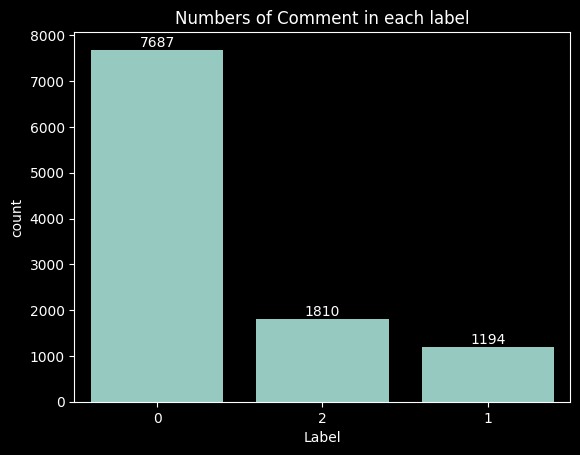

In [34]:
label_name = ['0','1','2']
plt.style.use('dark_background')
ax = sns.countplot(x ="Label", data = data)
plt.xticks (ticks = data['Label'].unique(), labels=label_name)
ax.bar_label (ax.containers[0])
plt.title ("Numbers of Comment in each label")
plt.show ()

In [35]:
#df = data[data['Label']==0]['Comment'].apply(len)
print ("Thống kê về độ dài của comment")
print("Độ dài trung bình của comment:",data['Comment'].apply(len).mean())

print ("Phân bố giá trị của comment: Min =",data['Comment'].apply(len).min(),", Max =",data['Comment'].apply(len).max())

print('-' * 55)
print ("Label 0")
print ("Miền giá trị độ dài: Min =",data[data['Label']==0]['Comment'].apply(len).min(),", Max =",data[data['Label']==0]['Comment'].apply(len).max())
print ("Độ dài trung bình của comment:",data[data['Label']==0]['Comment'].apply(len).mean())

print('-' * 55)
print ("Label 1")
print ("Miền giá trị độ dài: Min =",data[data['Label']==1]['Comment'].apply(len).min(),", Max =",data[data['Label']==0]['Comment'].apply(len).max())
print ("Độ dài trung bình của comment:",data[data['Label']==1]['Comment'].apply(len).mean())

print('-' * 55)
print ("Label 2")
print ("Miền giá trị độ dài: Min =",data[data['Label']==2]['Comment'].apply(len).min(),", Max =",data[data['Label']==0]['Comment'].apply(len).max())
print ("Độ dài trung bình của comment:",data[data['Label']==2]['Comment'].apply(len).mean())

Thống kê về độ dài của comment
Độ dài trung bình của comment: 34.58544570199233
Phân bố giá trị của comment: Min = 0 , Max = 238
-------------------------------------------------------
Label 0
Miền giá trị độ dài: Min = 0 , Max = 213
Độ dài trung bình của comment: 31.829842591388058
-------------------------------------------------------
Label 1
Miền giá trị độ dài: Min = 0 , Max = 213
Độ dài trung bình của comment: 37.20939226519337
-------------------------------------------------------
Label 2
Miền giá trị độ dài: Min = 0 , Max = 213
Độ dài trung bình của comment: 48.348408710217754


In [36]:
data = data[data['Comment'].apply(len) > 0]
data.reset_index(inplace = True)
data

,level_0,index,Id,Label,Comment,text
0,0,0,1,0,slayder gam cần_anh,slayder gam cần_anh
1,1,1,2,0,gam sẵn sèng,dạ mỗi khi gam cần em luôn sẵn sèng
2,2,2,3,0,sờ ty lè không_chỉ nhảy tường sờ ty lè nhảy ph...,sờ ty lè không_chỉ nhảy qua tường sờ ty lè nhả...
3,3,3,4,0,mê nhảy,mê cái cách anh này nhảy em
4,4,4,5,0,chúc_mừng gam kỳ chuyển_nhượng thành_công,chúc_mừng gam đã có kỳ chuyển_nhượng thành_công
...,...,...,...,...,...,...
10613,10686,10686,10687,2,ta bảo đạo_lí sống lol,người ta bảo người hay nói đạo_lí thường sống ...
10614,10687,10687,10688,2,riêng_tư đéo hari má,riêng_tư sao đéo có hari má
10615,10688,10688,10689,2,đạo_lý sống iồn,nói đạo_lý thường sống như iồn
10616,10689,10689,10690,2,lũ ngu ngục tụi mày tiền ủng_hộ phim đối_xử tụ...,lũ ngu ngục tụi mày bỏ tiền ủng_hộ phim nó giờ...


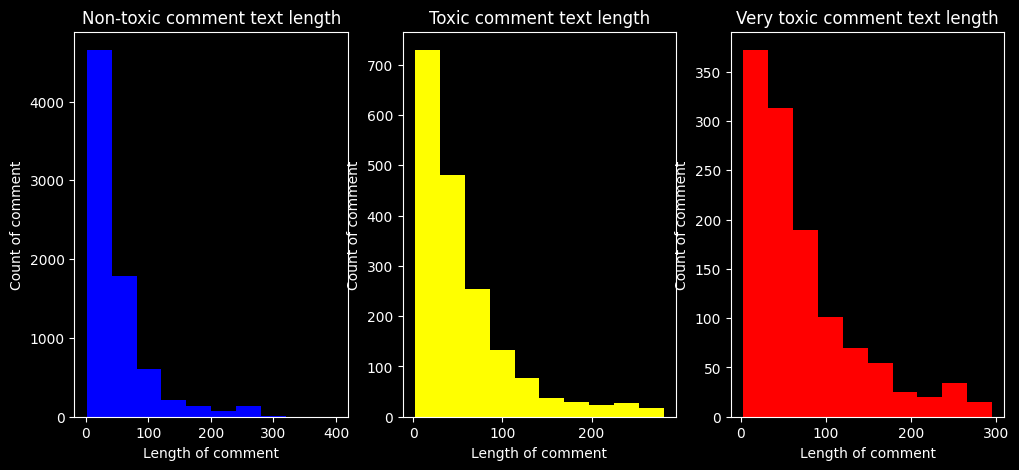

In [37]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
plt.style.use('dark_background')
text_len=data[data['Label']==0]['text'].apply(len)
ax1.hist(text_len,color='blue')
ax1.set_xlabel('Length of comment')
ax1.set_ylabel('Count of comment')
ax1.set_title('Non-toxic comment text length')

text_len=data[data['Label']==1]['text'].apply(len)
ax2.hist(text_len,color='yellow')
ax2.set_xlabel('Length of comment')
ax2.set_ylabel('Count of comment')
ax2.set_title('Toxic comment text length')

text_len=data[data['Label']==2]['text'].apply(len)
ax3.hist(text_len,color='red')
ax3.set_xlabel('Length of comment')
ax3.set_ylabel('Count of comment')
ax3.set_title('Very toxic comment text length')

plt.show()

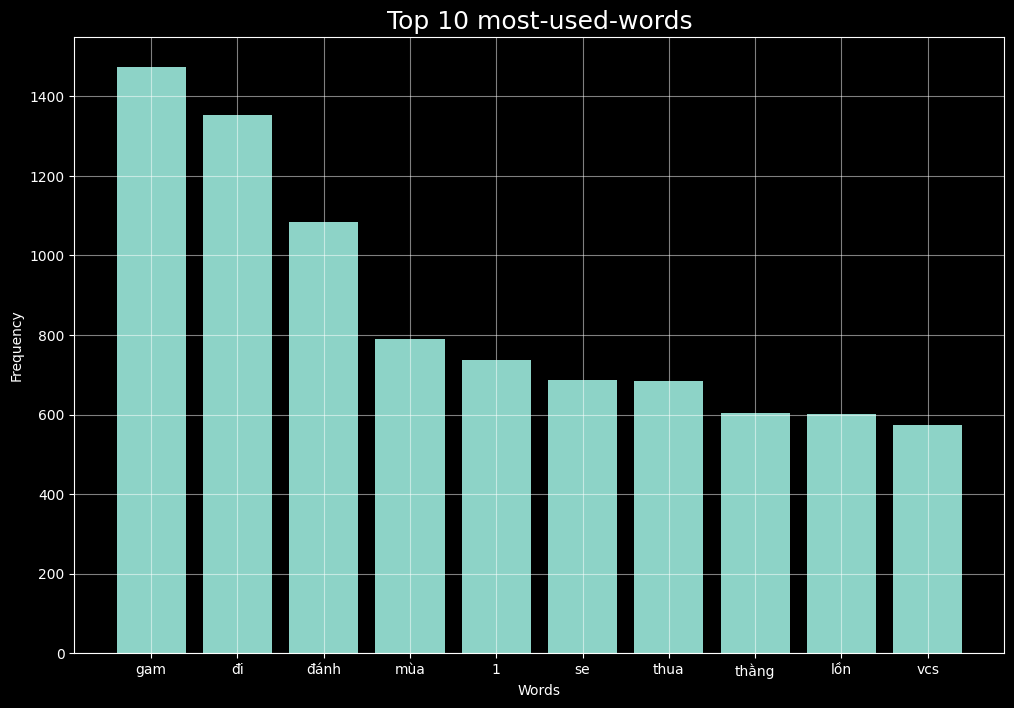

In [38]:
words = []

for text in data_train:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most-used-words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

Text(0.5, 9.444444444444438, 'Token Count')

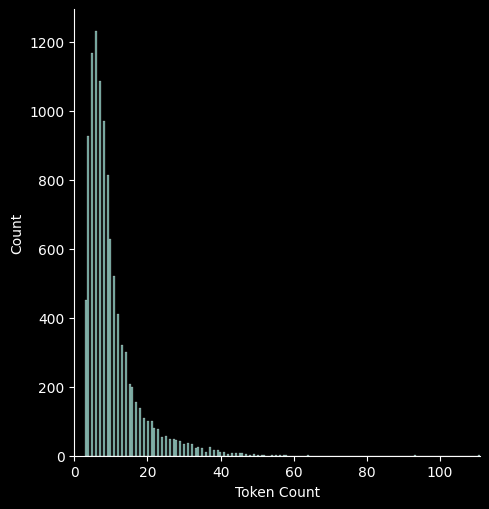

In [39]:
encoded_text = [tokenizer.encode(text, add_special_tokens=True) for text in data['Comment']]
token_lens = [len(text) for text in encoded_text]
sns.displot(token_lens)
plt.xlim([0,max(token_lens)])
plt.xlabel('Token Count')

##Spliting Data - Thực hiện phân chia tập dữ liệu thành tập Train và tập Test

- Tỉ lệ giữa tập Train và Test là 80:20

In [40]:
X = np.array(data['Comment'])
Y = np.array(data['Label'])

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 0, shuffle = True)

In [41]:
print ("Thống kê số lượng dữ liệu của tập Train và tập Test")

print ("Tập train")
print ("Kích thước tập Train:",xtrain.shape)
for i in range (len(label_name)):
    print(label_name[i],":",np.count_nonzero(ytrain==i))
print('-' * 55)
print ("Tập test")
print ("Kích thước tập Test:",xtest.shape)
for i in range(len(label_name)):
    print(label_name[i],":",np.count_nonzero(ytest==i))

Thống kê số lượng dữ liệu của tập Train và tập Test
Tập train
Kích thước tập Train: (8494,)
0 : 6110
1 : 1441
2 : 943
-------------------------------------------------------
Tập test
Kích thước tập Test: (2124,)
0 : 1506
1 : 368
2 : 250


#Chuyển text về vector (chọn 1 trong 2)

In [42]:
cv = CountVectorizer()

xtrain_transform = cv.fit_transform(xtrain)
xtest_transform = cv.transform (xtest)

In [43]:
tf = TfidfVectorizer()
xtrain_transform = tf.fit_transform(xtrain)
xtest_transform = tf.transform (xtest)

# Training


#PhoBert

In [44]:
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from transformers import get_linear_schedule_with_warmup

##Fine tuning

In [45]:
class CommentDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=30):
        self.df = df
        self.max_len = max_len
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        text, label = self.get_input_data(row)

        # Encode_plus will:
        # (1) split text into token
        # (2) Add the '[CLS]' and '[SEP]' token to the start and end
        # (3) Truncate/Pad sentence to max length
        # (4) Map token to their IDS
        # (5) Create attention mask
        # (6) Return a dictionary of outputs
        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_masks': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long),
        }

    def get_input_data(self, row):
        # Preprocessing: {remove icon, special character, lower}
        text = row['Comment']
        label = row['Label']
        return text, label

In [46]:
class CommentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(CommentClassifier, self).__init__()
        self.bert = phobert#AutoModel.from_pretrained("vinai/phobert-base")
        self.drop = nn.Dropout(p=0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, n_classes)
        nn.init.normal_(self.fc.weight, std=0.02)
        nn.init.normal_(self.fc.bias, 0)

    def forward(self, input_ids, attention_mask):
        last_hidden_state, output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=False # Dropout will errors if without this
        )

        x = self.drop(output)
        x = self.fc(x)
        return x

##Load Model

In [47]:
model = CommentClassifier(n_classes = 3)
model

CommentClassifier(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

##Tạo hàm train và val

In [48]:
def train(model, criterion, optimizer, train_loader):
    model.train()
    losses = []
    correct = 0

    for data in train_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_masks'].to(device)
        targets = data['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        loss = criterion(outputs, targets)
        _, pred = torch.max(outputs, dim=1)

        correct += torch.sum(pred == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        lr_scheduler.step()

    print(f'Train Accuracy: {correct.double()/len(train_loader.dataset)} Loss: {np.mean(losses)}')

def eval(test_data = False):
    model.eval()
    losses = []
    correct = 0

    with torch.no_grad():
        data_loader = test_loader if test_data else valid_loader
        for data in data_loader:
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_masks'].to(device)
            targets = data['targets'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, pred = torch.max(outputs, dim=1)

            loss = criterion(outputs, targets)
            correct += torch.sum(pred == targets)
            losses.append(loss.item())

    if test_data:
        print(f'Test Accuracy: {correct.double()/len(test_loader.dataset)} Loss: {np.mean(losses)}')
        return correct.double()/len(test_loader.dataset)
    else:
        print(f'Valid Accuracy: {correct.double()/len(valid_loader.dataset)} Loss: {np.mean(losses)}')
        return correct.double()/len(valid_loader.dataset)

In [49]:
def prepare_loaders(df):
    df_train, df_test =  train_test_split(df, test_size = 0.20, random_state = 0, shuffle = True)
    df_train, df_valid = train_test_split(df_train, test_size = 0.125, random_state = 0, shuffle = True)
    train_dataset = CommentDataset(df_train, tokenizer, max_len=30)
    valid_dataset = CommentDataset(df_valid, tokenizer, max_len=30)
    test_dataset = CommentDataset(df_test, tokenizer, max_len=30)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
    valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=2)

    return train_loader, valid_loader, test_loader

In [50]:
best_acc = 0

##Bắt đầu train

In [51]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
EPOCHS = 2
model = model.to(device)

In [52]:
train_loader, valid_loader,test_loader = prepare_loaders(data)

criterion = nn.CrossEntropyLoss()
    # Recommendation by BERT: lr: 5e-5, 2e-5, 3e-5
    # Batchsize: 16, 32
optimizer = AdamW(model.parameters(), lr=2e-5)

lr_scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=len(train_loader)*EPOCHS
        )
for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    print('-'*30)

    train(model, criterion, optimizer, train_loader)
    val_acc = eval()

    if val_acc > best_acc:
        torch.save(model.state_dict(), 'phobert.pth')
        best_acc = val_acc

Epoch 1/2
------------------------------
Train Accuracy: 0.7626480086114101 Loss: 0.6152487942077571
Valid Accuracy: 0.8041431261770244 Loss: 0.49561264672700095
Epoch 2/2
------------------------------
Train Accuracy: 0.8357104413347686 Loss: 0.4385929641677586
Valid Accuracy: 0.8380414312617702 Loss: 0.4525337701334673


##Pred && Eval

In [55]:
y = []
y_ = []

train_loader, valid_loader,test_loader = prepare_loaders(data)
model.eval()
with torch.no_grad():
        data_loader = test_loader
        for dat in data_loader:
            input_ids = dat['input_ids'].to(device)
            attention_mask = dat['attention_masks'].to(device)
            targets = dat['targets'].to(device)
            for i in targets:
                y.append(i)
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, pred = torch.max(outputs, dim=1)
            for i in pred:
                y_.append(i)

            # loss = criterion(outputs, targets)
            # correct += torch.sum(pred == targets)
            # losses.append(loss.item())

In [56]:
print(f"Accuracy: {accuracy_score(y,y_)}")
print(classification_report(y,y_))

Accuracy: 0.8531073446327684
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1506
           1       0.63      0.60      0.61       368
           2       0.73      0.68      0.70       250

    accuracy                           0.85      2124
   macro avg       0.76      0.74      0.75      2124
weighted avg       0.85      0.85      0.85      2124



In [57]:
print(f"Accuracy PhoBERT: {accuracy_score(y,y_)}")
print ("Precision:",precision_score(y,y_,average='macro'))
print ("Recall:",recall_score(y,y_,average='macro'))
print ("F1:",f1_score(y,y_,average='macro'))

Accuracy PhoBERT: 0.8531073446327684
Precision: 0.7607547694201259
Recall: 0.739571068383471
F1: 0.7496282356803912


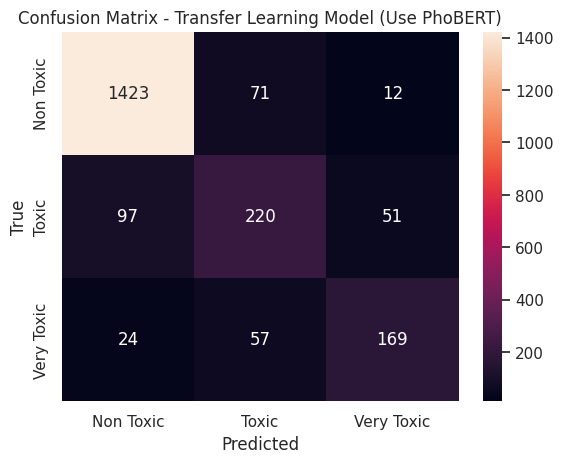

In [58]:
cf = confusion_matrix (y,y_)
label_name = ['Non Toxic','Toxic','Very Toxic']
sns.set(font_scale=1.)
sns.heatmap(cf, annot=True,xticklabels=label_name,yticklabels=label_name, annot_kws={"size": 12},fmt='d')
plt.title ("Confusion Matrix - Transfer Learning Model (Use PhoBERT)",fontsize=12)
plt.xlabel('Predicted',fontsize=12)
plt.ylabel('True',fontsize=12)
plt.show()

In [61]:
sentence_difference = []
predict_label = []
true_label = []

for i in range(len(y_)):
    if y_[i] != y[i]:
        sentence_difference.append(xtest[i])
        true_label.append(y[i])
        predict_label.append(y_[i])

dict_df = {
    "Sentence": sentence_difference,
    "Predict": predict_label,
    "True": true_label
}

df_differ = pd.DataFrame(dict_df)
# df_differ.to_csv("/content/differ_in_predict.csv", index=False)

df_differ


,Sentence,Predict,True
0,tương_lai buồi vẽ chi lo trụ hạng mùa đi kìa,tensor(1),tensor(0)
1,tao hari tao,tensor(1),tensor(0)
2,mong tiếp_tục,tensor(0),tensor(1)
3,đổ thừa ồn đánh động_viên,tensor(1),tensor(2)
4,may đánh thực_lực đéo buồn >,tensor(0),tensor(1)
...,...,...,...
307,5tings,tensor(2),tensor(1)
308,vãi cặc_ren out hả,tensor(0),tensor(2)
309,sgb_ren welcome back,tensor(1),tensor(2)
310,siêu lực chúc thành_công,tensor(2),tensor(1)


#Load model đã train trước đó

In [ ]:
model = CommentClassifier(n_classes = 3)
model.load_state_dict(torch.load('phobert.pth'))

<All keys matched successfully>

#Lưu model qua drive

In [ ]:
!cp  '/content/drive/MyDrive/IE304/phobert.pth' '/content/phobert.pth'